In [1]:
import pandas as pd
import numpy as np
import datatable as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Data = dt.fread("/Users/user/Desktop/自動化/UKCars_var_select.csv").to_pandas()

In [3]:
pd.set_option("max_columns", None)
Data.head()

,Day_of_Week,1st_Road_Class,Road_Type,Vehicle_Location-Restricted_Lane,Junction_Detail,Was_Vehicle_Left_Hand_Drive?,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Journey_Purpose_of_Driver,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Casualty_Class,Sex_of_Casualty,Age_Band_of_Casualty,Casualty_Type,Pedestrian_Crossing-Human_Control,Pedestrian_Location,Pedestrian_Movement,Casualty_Home_Area_Type,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,1st_Point_of_Impact,Sex_of_Driver,Age_Band_of_Driver,Driver_Home_Area_Type,LuckyOrNot,Number_of_Vehicles,Number_of_Casualties,Speed_limit,Age_of_Casualty,Car_Passenger,Bus_or_Coach_Passenger,Age_of_Driver,Engine_Capacity_(CC),Age_of_Vehicle
0,Tuesday,A,Single carriageway,On main c'way - not in restricted lane,Not at junction or within 20 metres,1,Zebra,Daylight,2,2,0,0,Others or Missing,Urban,Yes,Pedestrian,Male,36 - 45,Pedestrian,None within 50 metres,Crossing on pedestrian crossing facility,Crossing from driver's nearside,1,Car,0,Going ahead other,Not at or within 20 metres of junction,0,0,Front,Female,66 - 75,1,UnLucky,1.0,1.0,30.0,37.0,0.0,0.0,74.0,NaN,NaN
1,Wednesday,B,Dual carriageway,On main c'way - not in restricted lane,Crossroads,1,Pedestrian phase at traffic signal junction,Darkness - lights lit,1,1,0,0,Journey as part of work,Urban,Yes,Passenger,Male,36 - 45,Bus or coach occupant (17 or more pass seats),None within 50 metres,Not a Pedestrian,Not a Pedestrian,1,Bus or coach (17 or more pass seats),0,Slowing or stopping,Leaving roundabout,0,0,Nearside,Male,36 - 45,Others or Missing,UnLucky,1.0,1.0,30.0,37.0,0.0,4.0,42.0,8268.0,3.0
2,Thursday,C,Single carriageway,On main c'way - not in restricted lane,Not at junction or within 20 metres,1,No physical crossing facilities within 50 metres,Darkness - lights lit,1,1,0,0,Others or Missing,Urban,Yes,Driver or rider,Male,56 - 65,Car occupant,None within 50 metres,Not a Pedestrian,Not a Pedestrian,1,Car,0,Parked,Not at or within 20 metres of junction,0,0,Offside,Male,56 - 65,1,UnLucky,2.0,1.0,30.0,62.0,0.0,0.0,62.0,1762.0,6.0
3,Friday,A,Single carriageway,On main c'way - not in restricted lane,Not at junction or within 20 metres,1,No physical crossing facilities within 50 metres,Daylight,1,1,0,0,Others or Missing,Urban,Yes,Pedestrian,Male,26 - 35,Pedestrian,None within 50 metres,"In carriageway, crossing elsewhere",Crossing from nearside - masked by parked or s...,1,Car,0,Going ahead other,Not at or within 20 metres of junction,0,0,Front,Female,46 - 55,1,UnLucky,1.0,1.0,30.0,30.0,0.0,0.0,49.0,1769.0,4.0
4,Monday,Unclassified,Single carriageway,On main c'way - not in restricted lane,Not at junction or within 20 metres,1,No physical crossing facilities within 50 metres,Darkness - lighting unknown,1,2,0,0,Others or Missing,Urban,Yes,Driver or rider,Male,46 - 55,Motorcycle 125cc and under rider or passenger,None within 50 metres,Not a Pedestrian,Not a Pedestrian,Others or Missing,Motorcycle 125cc and under,0,Going ahead other,Not at or within 20 metres of junction,1,10,Front,Male,46 - 55,Others or Missing,UnLucky,1.0,1.0,30.0,49.0,0.0,0.0,49.0,85.0,10.0


### Data Manipulating ( Discrete Variables)

In [4]:
pd.options.mode.chained_assignment = None

In [5]:
def LuckyPCT(var) :
    Df = Data.groupby([var])["LuckyOrNot"].value_counts().unstack().assign(Lucky_pct = lambda x : x.Lucky / (x.Lucky + x.UnLucky))
    Df1 = Df.sort_values(by = "Lucky_pct", ascending = False)
    return Df1

In [6]:
# Day_of_Week        OK
# 1st_Road_Class     OK
# Road_Type          OK

In [7]:
# Vehicle_Location-Restricted_Lane
# LuckyPCT("Vehicle_Location-Restricted_Lane")
def replace_Vehicle_Location_Restricted_Lane(x):
    if "hard shoulder" in x :
        value = "Lay-By or Hard Shoulder"
    elif "On main c'way" in x :
        value = "Main Carriageway" 
    elif "Bus" in x :
        value = "Bus Lane or Busway"
    elif "Cycle" in x :
        value = "Cycle Lane or Cycleway"
    else :
        value = "Others or Missing"
    return value
Data.loc[:, "Vehicle_Location-Restricted_Lane"] = Data["Vehicle_Location-Restricted_Lane"].apply(replace_Vehicle_Location_Restricted_Lane).values

In [8]:
# Junction_Detail
Data.loc[:, "Junction_Detail"] = Data["Junction_Detail"].replace(
    to_replace = ["Slip road", "More than 4 arms (not roundabout)","Mini-roundabout"], 
    value = "Other junction").values

In [9]:
# Was_Vehicle_Left_Hand_Drive?    Keep
LuckyPCT("Was_Vehicle_Left_Hand_Drive?")

LuckyOrNot,Lucky,UnLucky,Lucky_pct
Was_Vehicle_Left_Hand_Drive?,,,
2,469,4437,0.095597
Others or Missing,847,16926,0.047657
1,104789,2275441,0.044025


In [10]:
# Pedestrian_Crossing-Physical_Facilities    Drop
LuckyPCT("Pedestrian_Crossing-Physical_Facilities")
# Can drop the column since the dominated value also has the highest Lucky percentage
Data.drop("Pedestrian_Crossing-Physical_Facilities", axis = 1, inplace = True)

In [11]:
# Light_Conditions
# LuckyPCT("Light_Conditions")
Data.loc[:, "Light_Conditions"] = Data["Light_Conditions"].apply(lambda x : "Darkness - no lights" if x in ["Darkness - no lighting", "Darkness - lights unlit"] else x).values

In [12]:
# Weather_Conditions     Keep
# LuckyPCT("Weather_Conditions")

In [13]:
# Road_Surface_Conditions     Keep
# LuckyPCT("Road_Surface_Conditions")

In [14]:
# Special_Conditions_at_Site     Keep
# LuckyPCT("Special_Conditions_at_Site")

In [15]:
# Carriageway_Hazards   OK
# LuckyPCT("Carriageway_Hazards")

In [41]:
# Journey_Purpose_of_Driver    Drop
# LuckyPCT(Journey_Purpose_of_Driver)

# LuckyOrNot                        Lucky   |  UnLucky   | Lucky_pct
# Journey_Purpose_of_Driver                 |            |
# ------------------------------------------------------------------------
# Other                               882   |    17108   |     0.05
# Others or Missing                 80590   |  1665661   |     0.05
# Journey as part of work           16705   |   347780   |     0.05
Data.drop("Journey_Purpose_of_Driver", axis = 1, inplace = True)

In [17]:
# Did_Police_Officer_Attend_Scene_of_Accident
Data.loc[:, "Did_Police_Officer_Attend_Scene_of_Accident"] = Data["Did_Police_Officer_Attend_Scene_of_Accident"].apply(lambda x : "No" if x not in ["Yes", "No", "Others or Missing"] else x).values

In [18]:
# Casualty_Class         OK
# Sex_of_Casualty        OK
# Age_Band_of_Casualty   OK

In [19]:
# Casualty_Type           Keep
# LuckyPCT("Casualty_Type")

def Replace_Casualty_Type(x) :
    if "Goods vehicle" in x :
        value = "Goods Vehicle occupant"
    elif "Minibus" in x :
        value = "Minibus(8-16) occupant"
    elif ("Car" in x) or ("car" in x) :
        value = "Car occupant"
    elif "Tram" in x :
        value = "Tram occupant"
    elif "Motorcycle" in x :
        value = "Motorcycle rider" 
    elif ("Pedestrian" in x) or ("Cyclist" in x) or("Bus" in x):
        value = x
    else :
        value = "Others"
    return value
        
Data.loc[:, "Casualty_Type"] = Data["Casualty_Type"].apply(Replace_Casualty_Type).values


In [20]:
# Pedestrian_Crossing-Human_Control       Drop
# Pedestrian_Location                     Drop
# Pedestrian_Movement                     Drop
Data.drop(["Pedestrian_Crossing-Human_Control", "Pedestrian_Location", "Pedestrian_Movement"], axis = 1, inplace = True)

In [21]:
# Casualty_Home_Area_Type     OK

In [22]:
# Vehicle_Type                Drop
# LuckyPCT("Vehicle_Type")
# Data.groupby("Casualty_Type")["Vehicle_Type"].value_counts().unstack()
# Vehicle is same as Casualty
Data.drop("Vehicle_Type", axis = 1, inplace = True)

In [23]:
# Towing_and_Articulation      Keep
# LuckyPCT("Towing_and_Articulation")

In [24]:
# Vehicle_Manoeuvrea
def replace_Vehicle_Manoeuvre(x):
    if "Going ahead"in x :
        value = "Going Ahead"
    elif "Waiting to" in x :
        value = "Waiting"
    elif "Turning" in x :
        value = "Turning"
    elif "Overtaking" in x :
        value = "Overtaking"
    elif "Changing lane" in x :
        value = "Changing Lane"
    else :
        value = x
    return value

Data.loc[:, "Vehicle_Manoeuvre"] = Data["Vehicle_Manoeuvre"].apply(replace_Vehicle_Manoeuvre).values

In [25]:
# Junction_Location
def Replace_Junction_Location(X):
    if "Approaching" in X :
        value = "Approaching Junction or Near"
    elif "Mid Junction" in X :
        value = "in Middle"
    elif "waiting" in X :
        value = "Waiting or Parking"
    elif "Entering" in X:
        value = "Entering"
    elif "Leaving" in X :
        value = "Leaving"
    elif "Data missing" in X :
        value = "Missing"
    else :
        value = X
    return value


Data.loc[:, "Junction_Location"] = Data["Junction_Location"].apply(Replace_Junction_Location).values

In [26]:
# Skidding_and_Overturning     Keep
LuckyPCT("Skidding_and_Overturning")

LuckyOrNot,Lucky,UnLucky,Lucky_pct
Skidding_and_Overturning,,,
3,120,904,0.117188
2,7070,78748,0.082384
4,79,886,0.081865
5,4534,56555,0.074220
1,19882,268518,0.068939
0,74418,1891042,0.037863
Others or Missing,2,151,0.013072


In [27]:
# Hit_Object_in_Carriageway      Keep
LuckyPCT("Hit_Object_in_Carriageway")

LuckyOrNot,Lucky,UnLucky,Lucky_pct
Hit_Object_in_Carriageway,,,
1,169,659,0.204106
Others or Missing,21,134,0.135484
5,83,641,0.114641
6,260,2416,0.097160
10,4310,56868,0.070450
9,201,3444,0.055144
7,886,15657,0.053557
4,1467,32034,0.043790
0,98172,2167818,0.043324


In [28]:
# 1st_Point_of_Impact           OK

In [29]:
# Sex_of_Driver
Data.loc[:, "Sex_of_Driver"] = Data["Sex_of_Driver"].apply(lambda x : x if x in ["Male", "Female"] else "Others or Missing").values

In [30]:
# Age_Band_of_Driver           OK
Data.groupby("Driver_Home_Area_Type")["Casualty_Home_Area_Type"].value_counts().unstack()
# Driver_Home_Area_Type        Keep

Casualty_Home_Area_Type,1,2,3,Others or Missing
Driver_Home_Area_Type,,,,
1,1501467,14166,14998,105892
2,16943,166007,6015,10505
3,20022,7135,212410,11911
Others or Missing,85995,6742,7137,215564


In [31]:
Data["LuckyOrNot"].value_counts()

UnLucky    2296804
Lucky       106105
Name: LuckyOrNot, dtype: int64

### Data Manipulating ( Numeric Variables)

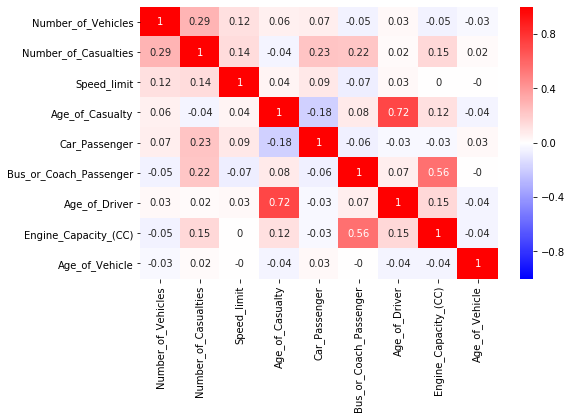

In [32]:
# Pearson Correlation Plot
plt.figure(figsize=(8,5))
sns.heatmap(Data.select_dtypes(include = ["float", "int"]).corr().round(2), 
            cmap = "bwr", annot = True, vmin=-1, vmax=1)
plt.show()

In [33]:
# Statistical Summary
pd.options.display.float_format = '{:.2f}'.format
Data.select_dtypes(include = ["float", "int"]).describe()

,Number_of_Vehicles,Number_of_Casualties,Speed_limit,Age_of_Casualty,Car_Passenger,Bus_or_Coach_Passenger,Age_of_Driver,Engine_Capacity_(CC),Age_of_Vehicle
count,2402909.00,2402909.00,2402909.00,2353995.00,2402129.00,2402846.00,2308445.00,1807804.00,1735458.00
mean,1.94,1.85,40.23,35.23,0.28,0.09,37.75,1767.12,7.44
std,0.90,2.02,14.69,18.37,0.59,0.56,16.06,1486.62,4.61
min,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00
25%,1.00,1.00,30.00,21.00,0.00,0.00,24.00,1242.00,4.00
50%,2.00,1.00,30.00,32.00,0.00,0.00,35.00,1590.00,7.00
75%,2.00,2.00,60.00,47.00,0.00,0.00,48.00,1956.00,10.00
max,67.00,93.00,70.00,104.00,2.00,4.00,100.00,99999.00,111.00


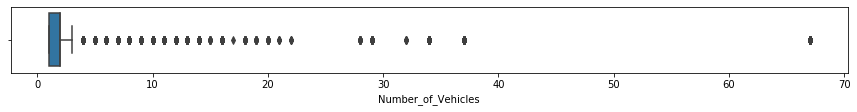

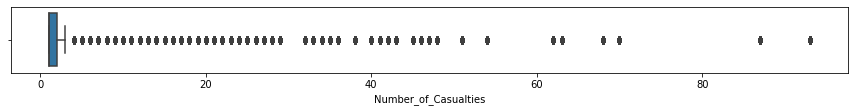

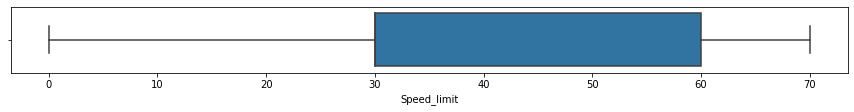

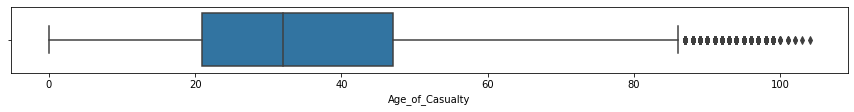

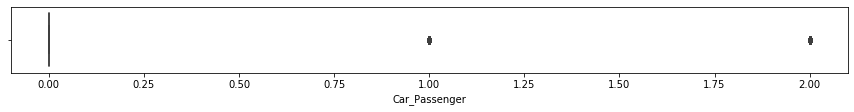

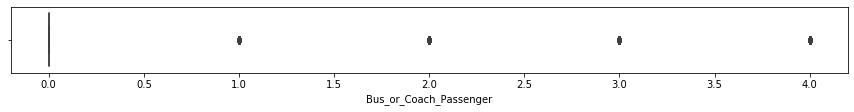

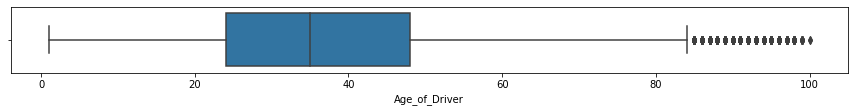

In [34]:
# Boxplot
for i in range(7) :
    plt.figure(figsize=(15,10))
    plt.subplot(7,1,i+1)
    sns.boxplot(x = Data.select_dtypes(include = "float").columns[i], data = Data)
    plt.show()

In [35]:
# Engine_Capacity_(CC)
# Clamp Transformation 3 times std
EngineCC_Ser = Data["Engine_Capacity_(CC)"]
Data.loc[:, "Engine_Capacity_(CC)"] = np.where(EngineCC_Ser > EngineCC_Ser.median() + 3 * EngineCC_Ser.std(), EngineCC_Ser > EngineCC_Ser.median() + 3 * EngineCC_Ser.std(), EngineCC_Ser)

In [36]:
# Number_of_Casualtis 基本上就是每一個 Accident ID 的 Row Count
Data.drop("Number_of_Casualties",axis = 1, inplace = True)

### Plot Again!

Day_of_Week  :



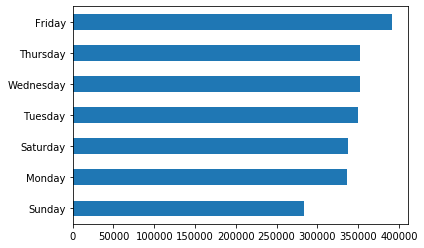

1st_Road_Class  :



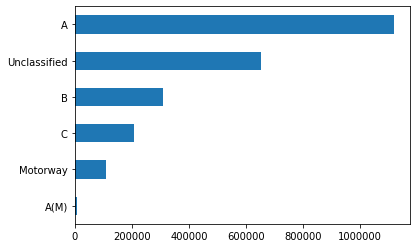

Road_Type  :



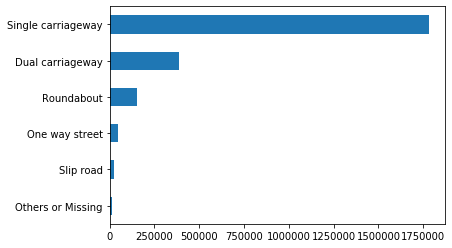

Vehicle_Location-Restricted_Lane  :



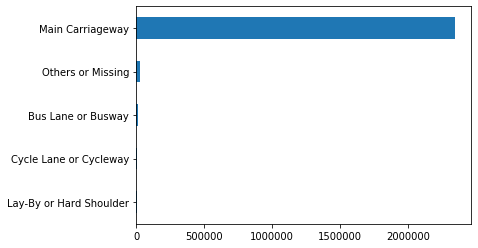

Junction_Detail  :



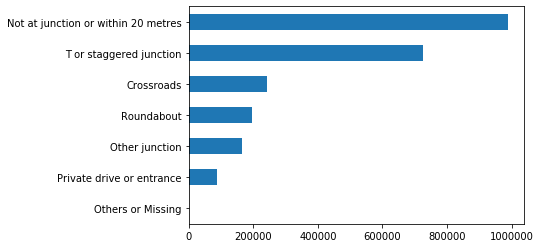

Was_Vehicle_Left_Hand_Drive?  :



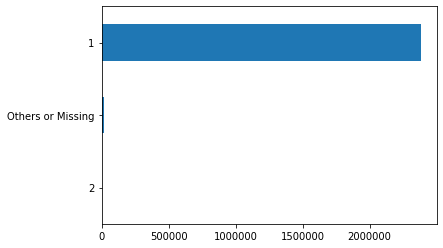

Light_Conditions  :



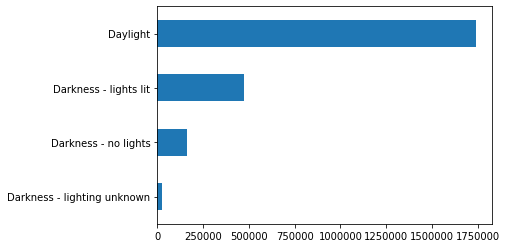

Weather_Conditions  :



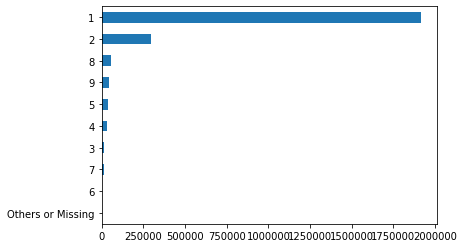

Road_Surface_Conditions  :



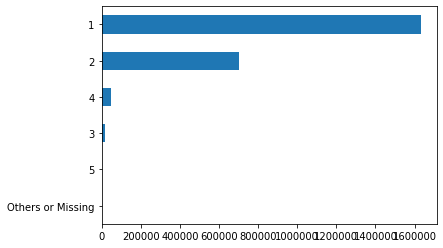

Special_Conditions_at_Site  :



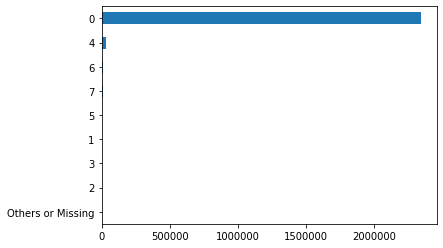

Carriageway_Hazards  :



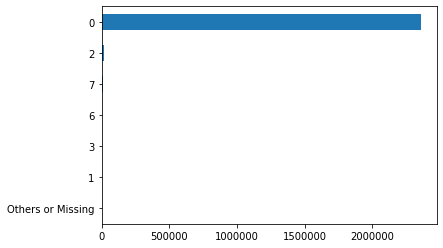

Urban_or_Rural_Area  :



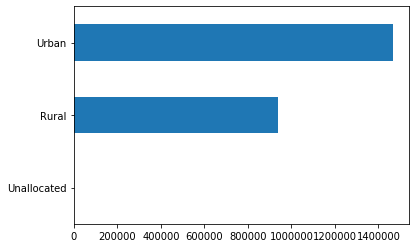

Did_Police_Officer_Attend_Scene_of_Accident  :



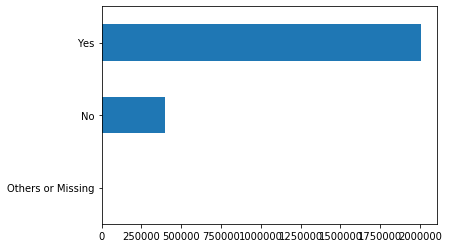

Casualty_Class  :



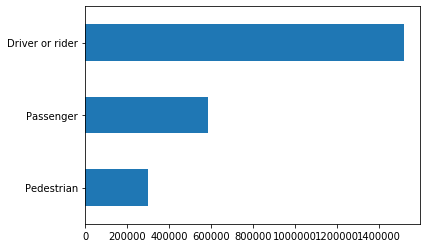

Sex_of_Casualty  :



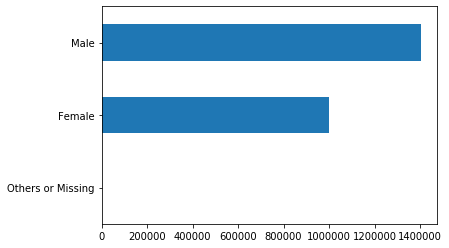

Age_Band_of_Casualty  :



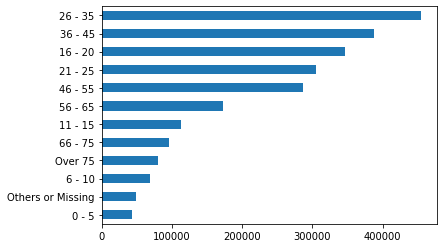

Casualty_Type  :



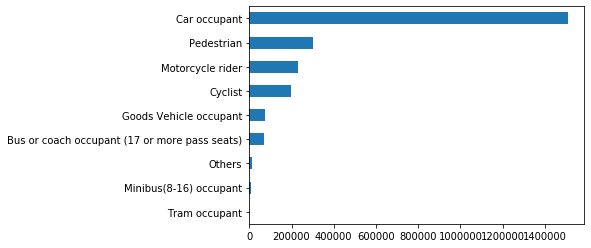

Casualty_Home_Area_Type  :



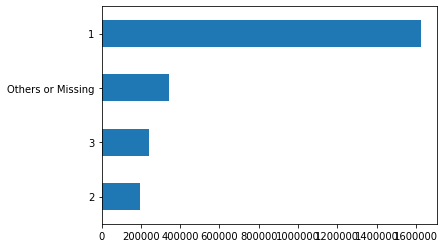

Towing_and_Articulation  :



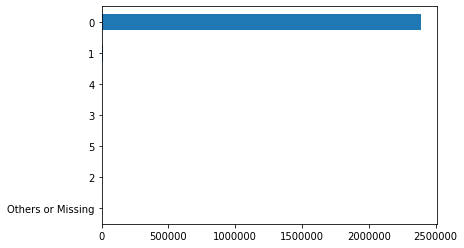

Vehicle_Manoeuvre  :



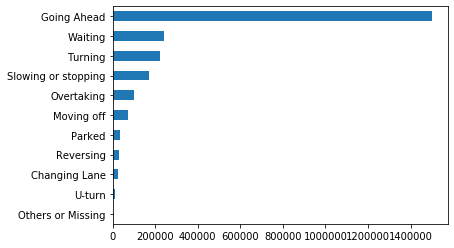

Junction_Location  :



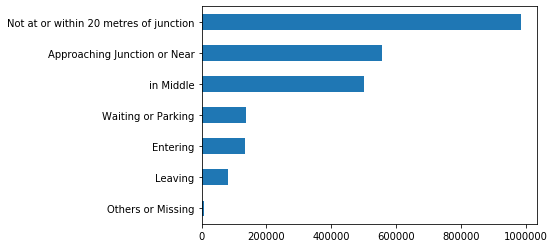

Skidding_and_Overturning  :



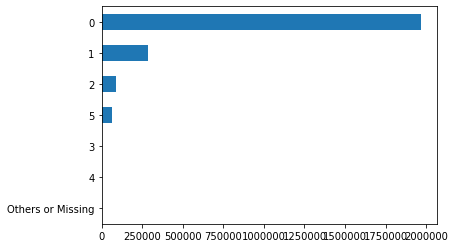

Hit_Object_in_Carriageway  :



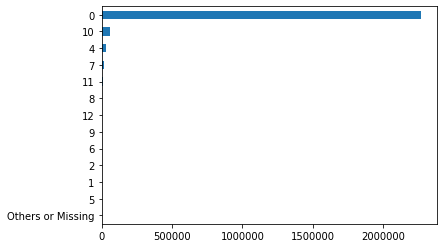

1st_Point_of_Impact  :



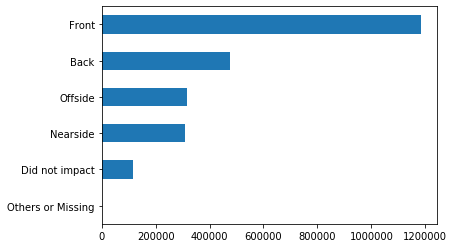

Sex_of_Driver  :



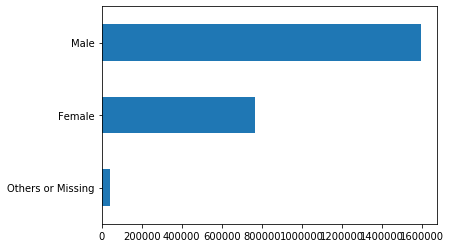

Age_Band_of_Driver  :



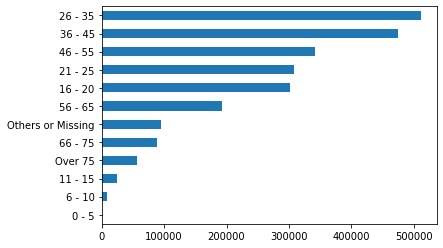

Driver_Home_Area_Type  :



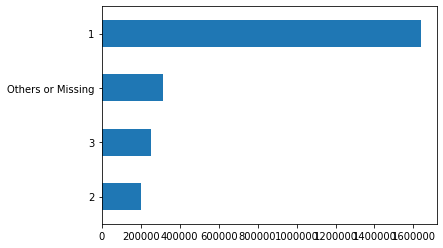

LuckyOrNot  :



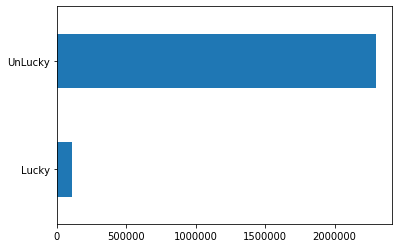

In [42]:
# Discrete Varibale Conditional distribution
def PLOT(var) :
    global Data
    Data[var].value_counts().sort_values().plot.barh()
    
for i in Data.select_dtypes(include = "object").columns :
    print(i, " :")
    print()
    PLOT(i)
    plt.show()

/Users/user/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c621a90>,
      dtype=object)

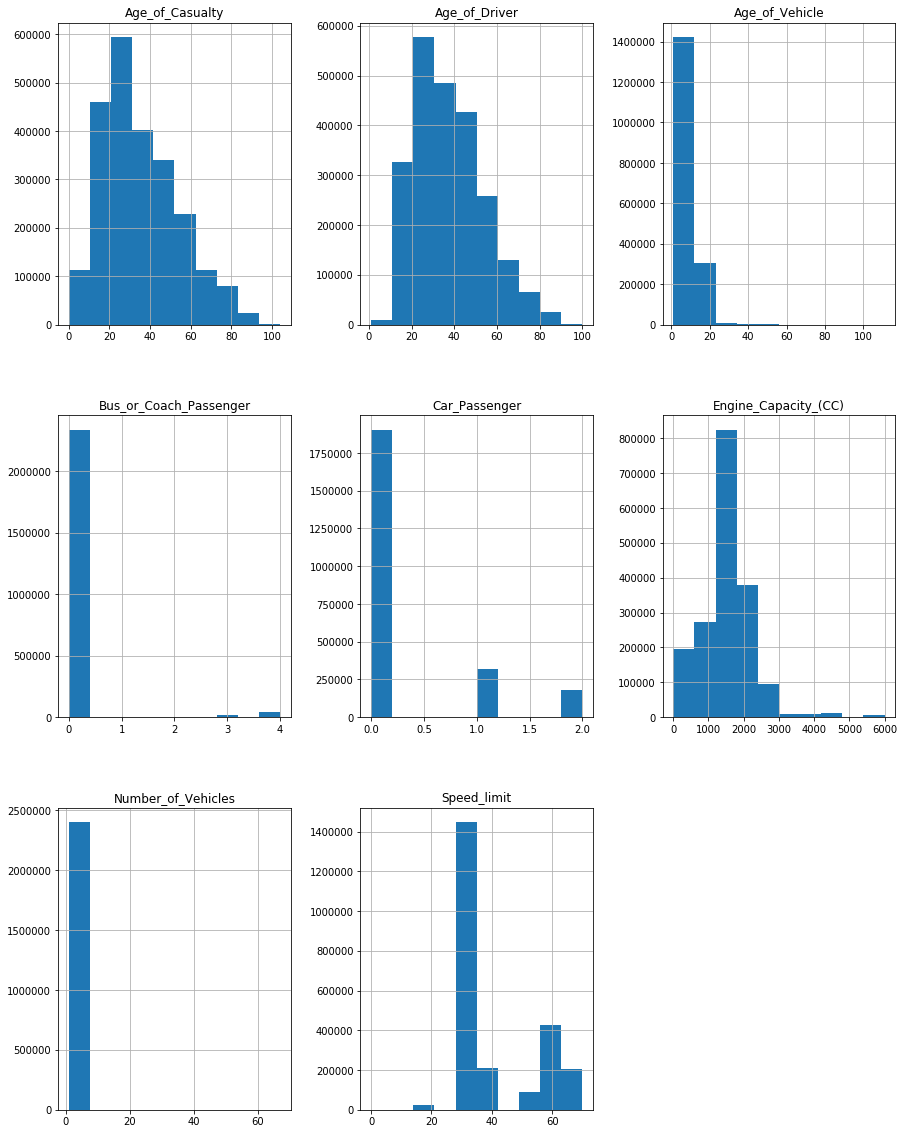

In [38]:
# Numeric Var Distribution
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
Data.hist(ax = ax)

In [43]:
Data.to_csv("/Users/user/Desktop/自動化/Data_For_Model.csv", index = False)